In [1]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume_ov,inbtou_spending,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,,
2010,NaN,5.960000e+09,0,0,0.000000,2010
2011,NaN,5.840000e+09,0,0,0.000000,2011
2012,NaN,5.820000e+09,0,0,0.000000,2012
2013,NaN,5.800000e+09,0,0,0.000000,2013
2014,2537200.0,6.100000e+09,0,0,0.000000,2014
2015,2642800.0,6.500000e+09,0,0,0.000000,2015
2016,2647300.0,6.660000e+09,0,0,0.000000,2016
2017,2247800.0,5.550000e+09,0,0,0.000000,2017
2018,1766600.0,5.000000e+09,0,0,0.000000,2018


Estimated COVID-19 effect: -777406 ± 369820 (95% confidence)


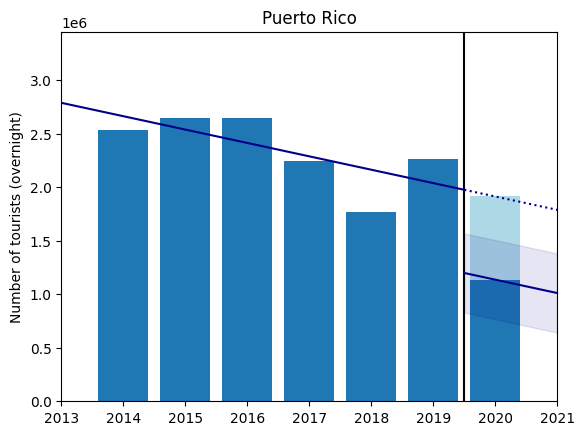

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_ov   R-squared:                       0.885
Model:                              OLS   Adj. R-squared:                  0.827
Method:                   Least Squares   F-statistic:                     15.32
Date:                  Wed, 26 Apr 2023   Prob (F-statistic):             0.0133
Time:                          15:40:59   Log-Likelihood:                 6.4641
No. Observations:                     7   AIC:                            -6.928
Df Residuals:                         4   BIC:                            -7.090
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       126.0913  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [6]:
# Set up plot
plt.title('Puerto Rico')
plt.ylabel('Number of tourists (overnight)')
plt.xlim(2013, 2021)
y_name = 'inbtou_volume_ov'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)